In [1]:
import numpy as np
import os
from os import listdir
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from tqdm import tqdm
import random
import pickle

In [2]:
DATADIR = r"C:\Users\sulut\OneDrive\Documents\Data\bloodcell\dataset2-master\dataset2-master\images"
ogAddy = os.listdir(DATADIR)

testDir= r'C:\Users\sulut\OneDrive\Documents\Data\bloodcell\dataset2-master\dataset2-master\images\TEST'

trainDir= r'C:\Users\sulut\OneDrive\Documents\Data\bloodcell\dataset2-master\dataset2-master\images\TRAIN'

testsimpleDir= r'C:\Users\sulut\OneDrive\Documents\Data\bloodcell\dataset2-master\dataset2-master\images\TEST_SIMPLE'

splits = ['TRAIN','TEST']

categories = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


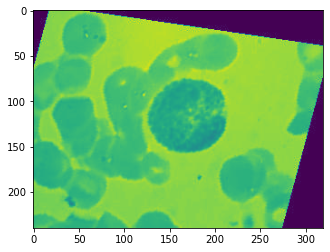

In [3]:
for split in splits:
    path = os.path.join(DATADIR,split)
    for category in categories:
        path = os.path.join(path,category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array)
            plt.show()
            break
        break
    break

In [4]:
print(img_array)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [166 167 169 ...   0   0   0]
 [167 168 171 ...   0   0   0]
 [167 169 172 ...   0   0   0]]


In [5]:
print(img_array.shape)

(240, 320)


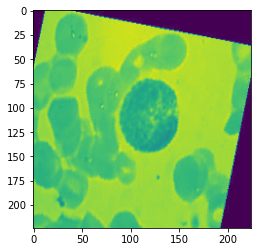

In [6]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [7]:
path = ''

training_data = []
training_labels = []

def create_training_data():
    
    for category in categories: 

        path = os.path.join(trainDir,category) 
        class_num = category.index(category) 

        for img in tqdm(os.listdir(path)):
            try:
                name = os.path.basename(path)
                if name == 'EOSINOPHIL':
                    class_num = 0
                    
                elif name == 'LYMPHOCYTE':
                    class_num = 1
                
                elif name == 'MONOCYTE':
                    class_num = 2
                    
                elif name == 'NEUTROPHIL':
                    class_num = 3

                else: class_num = 4
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append(new_array)
                training_labels.append(class_num)
            except Exception as e:  
                pass


create_training_data()
print(len(training_data))
print(len(training_labels))

100%|██████████| 2499/2499 [00:03<00:00, 712.50it/s]

9957
9957


In [8]:
def add_test_data():
        for category in categories: 

            path = os.path.join(testDir,category) 
            class_num = category.index(category)  

            for img in tqdm(os.listdir(path)): 
                try:
                    name = os.path.basename(path)
                    if name == 'EOSINOPHIL':
                        class_num = 0

                    elif name == 'LYMPHOCYTE':
                        class_num = 1

                    elif name == 'MONOCYTE':
                        class_num = 2

                    elif name == 'NEUTROPHIL':
                        class_num = 3

                    else: class_num = 4
                    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR) 
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                    training_data.append(new_array)
                    training_labels.append(class_num)  
                except Exception as e:  
                    pass

add_test_data()
print(len(training_data))
print(len(training_labels))

100%|██████████| 624/624 [00:00<00:00, 703.61it/s]

12444
12444


In [9]:
c = list(zip(training_data, training_labels))

random.shuffle(c)

training_data , training_labels = zip(*c)

In [10]:
pickle_out = open("bloodcelldata.pickle","wb")
pickle.dump(training_data, pickle_out)
pickle_out.close()

pickle_out = open("bloodcelllabels.pickle","wb")
pickle.dump(training_labels, pickle_out)
pickle_out.close()
